# AOL user query data
#### for trifti@abhisheik

Data of user web search

#### Data is closed to 3.5M so expressing analysis in % terms would be more meaningful and makes sense

## Things I wanted to do; but couldn't due to time constraint
1. Run NLP on queries to see which queries are close
2. Profanity check on queries
3. some visualisation on clustered data



In [1]:
# import required libraries
import pandas as pd
import numpy as np
import re
from datetime import datetime
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# read the dataset
data_file = "user-ct-test-collection-02.txt"
df = pd.read_csv(data_file,sep="\t")
df.shape

(3614506, 5)

In [3]:
totalQuery = df.shape[0]

### Pre-processing
Few things that I would like to do:
1. [IGNORED] Replace NaN values with blank so they do not error-out during processing.
2. Split QueryTime in 2 features: QueryDate, QueryTime. This will help us in analyzing each of them more efficiently. 
3. Few URLs are missing www. So lets remove 'http://' and 'www' from URL string. 


In [4]:
df.isnull().sum()

AnonID             0
Query            129
QueryTime          0
ItemRank     1678893
ClickURL     1678893
dtype: int64

In [ ]:
# 1. Null values
#df = df.fillna("")
#df.isnull().sum()

In [3]:
# 2. Date time split

# convert querytime to timestamp format and extract date/time
df["QueryTime"] = pd.to_datetime(df["QueryTime"])
df["QDate"] = [d.date() for d in df["QueryTime"]]
df["QTime"] = [d.time() for d in df["QueryTime"]]


In [4]:
# 3 Handle http and www in urls
df["URL"] = df["ClickURL"].str.replace('http://|https://|www.','',regex=True)


In [7]:
df.head(10)

,AnonID,Query,QueryTime,ItemRank,ClickURL,QDate,QTime,URL
0,479,family guy,2006-03-01 16:01:20,NaN,NaN,2006-03-01,16:01:20,NaN
1,479,also sprach zarathustra,2006-03-02 14:48:55,NaN,NaN,2006-03-02,14:48:55,NaN
2,479,family guy movie references,2006-03-03 22:37:46,1.0,http://www.familyguyfiles.com,2006-03-03,22:37:46,familyguyfiles.com
3,479,top grossing movies of all time,2006-03-03 22:42:42,1.0,http://movieweb.com,2006-03-03,22:42:42,movieweb.com
4,479,top grossing movies of all time,2006-03-03 22:42:42,2.0,http://www.imdb.com,2006-03-03,22:42:42,imdb.com
5,479,car decals,2006-03-03 23:20:12,4.0,http://www.decaljunky.com,2006-03-03,23:20:12,decaljunky.com
6,479,car decals,2006-03-03 23:20:12,1.0,http://www.modernimage.net,2006-03-03,23:20:12,modernimage.net
7,479,car decals,2006-03-03 23:20:12,5.0,http://www.webdecal.com,2006-03-03,23:20:12,webdecal.com
8,479,car window decals,2006-03-03 23:24:05,9.0,http://www.customautotrim.com,2006-03-03,23:24:05,customautotrim.com
9,479,car window sponsor decals,2006-03-03 23:27:17,3.0,http://www.streetglo.net,2006-03-03,23:27:17,streetglo.net


### a) Extract relevant metrics, create visualizations, and share a few (2 to 3) insights that you find interesting.
### b) What do you want to share with the Product Manager of Search based on exploratory analysis of this dataset?

1. Query distribution over date
2. Query distribution over hour
3. Query distribution over minute (did not gave much relevant information)
4. ItemRank distribution

From README.txt we learnt that for a search if user clicked on multiple search, then there would be multiple records. In layman terms, "Query,AnonID" would have multiple records of QueryTime, ItemRank and URL. So 
5. How far user has to go to get desired results
6. How much time user has to spend to get desired results
7. Query per user
8. top 50 users having most queries
9. How far user has to go to get desired results for a query
10. How much time user has to spend to get desired results


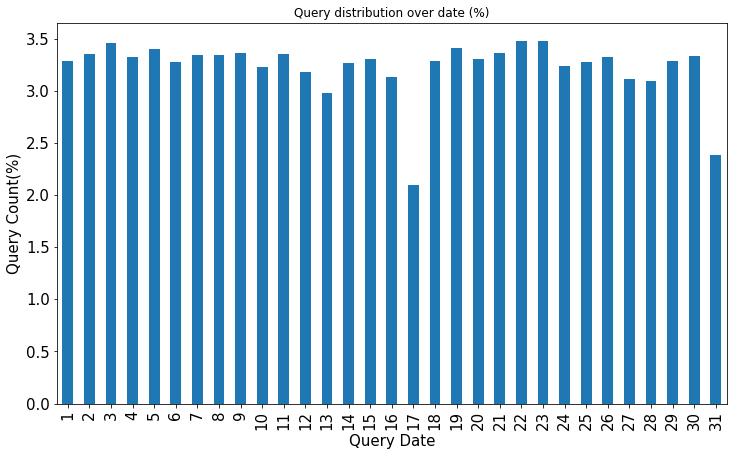

In [8]:
# 1. Query distribution over date
queryByDay = (pd.Series([d.day for d in df["QDate"]]).value_counts()*100/totalQuery).sort_index()
barplot = queryByDay.plot.bar(figsize=(12,7),legend=False,fontsize=15)
barplot.set_xlabel("Query Date",fontsize=15)
barplot.set_ylabel("Query Count(%)",fontsize=15)
barplot.set_title("Query distribution over date (%)")
plt.show()


#### From above we can infer: 
1. Users are quite active through out the month except on 17 and 31 date. This can be attributed mainly to below 2 factor:
 - In US salary is paid fornightly. Salary receipt is celebrated by keeping oneself away from internet. (Party time..!!!)
 - Not all month have 31days. But count quite consistent with 17th date, so we can infer that average is quite same as other days. 



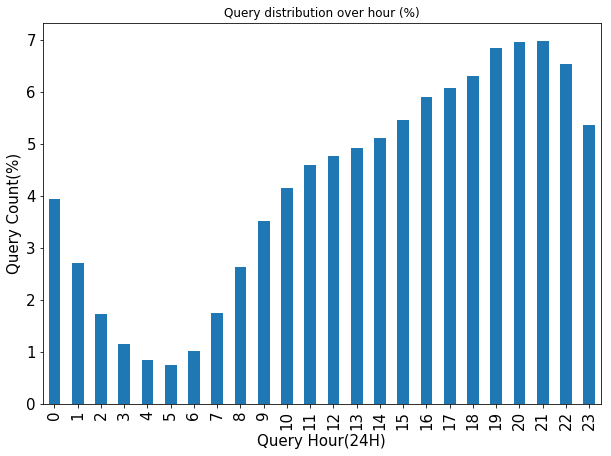

In [9]:
# 2. Query distribution over hour (percentage)
queryByHour = (pd.Series([d.hour for d in df["QTime"]]).value_counts()*100/totalQuery).sort_index()
barplot = queryByHour.plot.bar(figsize=(10,7),legend=False,fontsize=15)
barplot.set_xlabel("Query Hour(24H)",fontsize=15)
barplot.set_ylabel("Query Count(%)",fontsize=15)
barplot.set_title("Query distribution over hour (%)")
plt.show()



#### From above we can infer: 
As users starts their days, so the increase in use of search. 9PM is the peak time of max search and then it drops drastically till 5 in the morning. But we do have substantial search around 4-5AM (traffic is almost one-fifth of peak hours). Few things to note:
1. Users are mot active during evening hours 6-10PM
2. Advertizers can benefit by targeting peak hours. (more than 6% of traffic)
3. Advertisement host can earn more revenue by increasing display rate during peak hours. 
4. Any server maintenance activity can be carried out during 3-6AM window when traffic is low


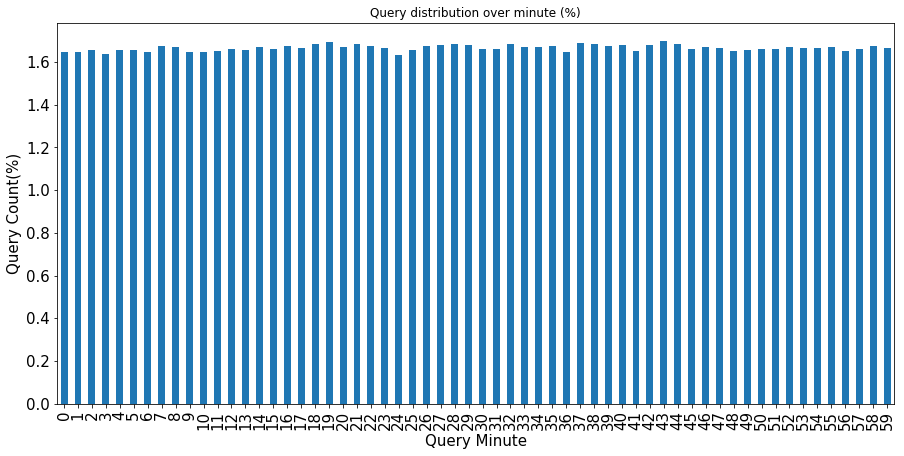

In [10]:
# 3. Query distribution over minute
queryByMin = (pd.Series([d.minute for d in df["QTime"]]).value_counts()*100/totalQuery).sort_index()
barplot = queryByMin.plot.bar(figsize=(15,7),legend=False,fontsize=15)
barplot.set_xlabel("Query Minute",fontsize=15)
barplot.set_ylabel("Query Count(%)",fontsize=15)
barplot.set_title("Query distribution over minute (%)")
plt.show()

Usage per minute is almost consistent. 

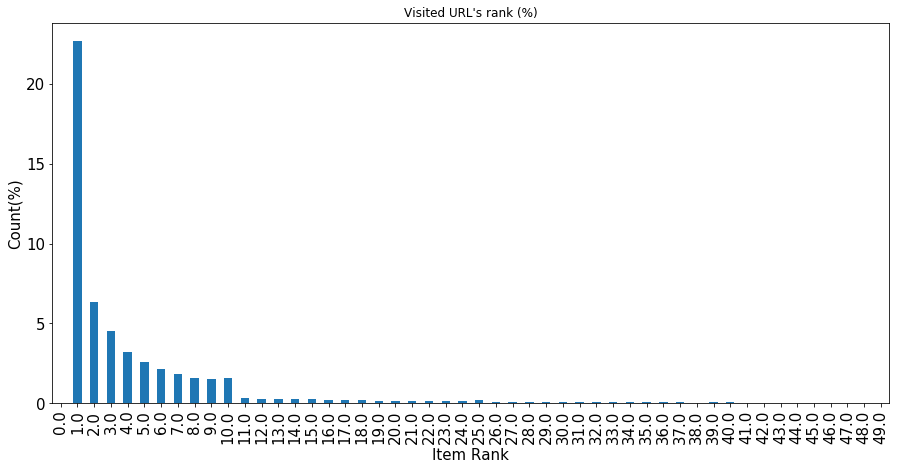

ItemRank
490.0    0.000028
492.0    0.000111
493.0    0.000138
494.0    0.000028
495.0    0.000055
496.0    0.000055
497.0    0.000138
498.0    0.000138
499.0    0.000194
500.0    0.000415
Name: Query, dtype: float64

In [11]:
# 4. ItemRank distribution

queryByIR = df.groupby(by='ItemRank')['Query'].count()*100/totalQuery
barplot = queryByIR.head(50).plot.bar(figsize=(15,7),legend=False,fontsize=15)
barplot.set_xlabel("Item Rank",fontsize=15)
barplot.set_ylabel("Count(%)",fontsize=15)
barplot.set_title("Visited URL's rank (%)")
plt.show()

# display count of bottom10 ranks
queryByIR.tail(10)

#### From above we can infer:
1. 22% of the users (aprox one-fourth) visited URL at first rank
2. Very low (almost insignificant) i.e. 386 users clicked on rank 0. Not sure what it is and what it means.
3. Given that a search has 10 results per page, so majority of users gets their results in first page. 
4. Url click decreases significantly after 10th rank. 
5. Few users did went till 500 item !!!! and they are indeed interested in checking the 500th URL (hit % of 500th is high)

There are 1244496 unique query and 66000 unique users in data set.
Which makes 18 query per user.


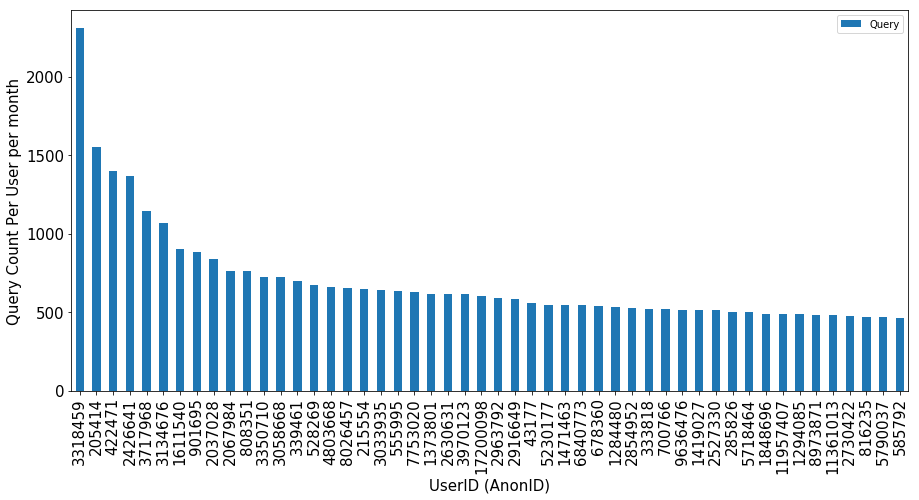

In [12]:
# 7. Query per user
unique_query = df["Query"].unique()
unique_users = df["AnonID"].unique()
print("There are {0} unique query and {1} unique users in data set.".format(len(unique_query),len(unique_users) ) )
print("Which makes {} query per user.".format(int(len(unique_query)/len(unique_users))))

# 8. top 50 users having most queries
top50users_byquery = df.groupby(by="AnonID")['Query'].count().sort_values(ascending=False).head(50)
barplot = (top50users_byquery/3).plot.bar(figsize=(15,7),legend=True,fontsize=15)
barplot.set_xlabel("UserID (AnonID)",fontsize=15)
barplot.set_ylabel("Query Count Per User per month",fontsize=15)
plt.show()

#### From above we can infer:
1. User 3318459 is most active user with aprox 2300 queries per month i.e. 77 queries per day, 8 queries per hour (considering 10 active hours). This is almost 1K more than any other user. This activity looks like that of a group rather than an individual. 
2. Abovee chart shows most active users of search
3. Data set has 18 queries per user. 



### Below we will try to find out:
#### How far user has to go to get desired results for a query ??
#### How much time user has to spend to get desired results ??

In [13]:
# 9. How far user has to go to get desired results for a query
# 10. How much time user has to spend to get desired results

dfAnonQryGrp = df.groupby(by=["AnonID","Query"])

# calculate itemrank agg
df_query_IR_QDT = dfAnonQryGrp["ItemRank"].agg({'FirstItemRankVisited':np.min,'LastItemRankVisted':np.max})
df_query_IR_QDT["TotalPageVisits"] = dfAnonQryGrp["ItemRank"].count()

# calculate querytime agg
df_query_IR_QDT[['FirstTimeVisited','LastTimeVisited']] = dfAnonQryGrp["QueryTime"].agg({'FirstTimeVisited':np.min,'LastTimeVisited':np.max})
df_query_IR_QDT["TimeSpent"] = df_query_IR_QDT["LastTimeVisited"] - df_query_IR_QDT["FirstTimeVisited"]
# time spent in minutes
df_query_IR_QDT["TimeSpentMin"] = (df_query_IR_QDT["TimeSpent"].dt.components['days'] *24*60) + \
                                (df_query_IR_QDT["TimeSpent"].dt.components['hours'] * 60) + \
                                (df_query_IR_QDT["TimeSpent"].dt.components['minutes'])

# reset index and show top50
df_query_IR_QDT = df_query_IR_QDT.reset_index()
df_query_IR_QDT.head(50)



C:\Users\yadav\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  import sys
C:\Users\yadav\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  # This is added back by InteractiveShellApp.init_path()


,AnonID,Query,FirstItemRankVisited,LastItemRankVisted,TotalPageVisits,FirstTimeVisited,LastTimeVisited,TimeSpent,TimeSpentMin
0,479,6 6 06,NaN,NaN,0,2006-04-28 22:19:18,2006-04-28 22:19:18,0 days 00:00:00,0
1,479,allegory of the cave,1.0,6.0,3,2006-03-06 22:03:19,2006-03-06 22:03:19,0 days 00:00:00,0
2,479,also sprach zarathustra,NaN,NaN,0,2006-03-02 14:48:55,2006-03-02 14:48:55,0 days 00:00:00,0
3,479,average tax refund in 2005,1.0,1.0,1,2006-04-07 01:54:56,2006-04-07 01:54:56,0 days 00:00:00,0
4,479,bose,1.0,1.0,1,2006-03-03 23:30:11,2006-03-03 23:30:11,0 days 00:00:00,0
5,479,bose car decal,1.0,7.0,3,2006-03-03 23:31:48,2006-03-03 23:31:48,0 days 00:00:00,0
6,479,brand name decals,NaN,NaN,0,2006-03-03 23:29:58,2006-03-03 23:29:58,0 days 00:00:00,0
7,479,britannica,1.0,1.0,1,2006-03-13 18:41:09,2006-03-13 18:41:09,0 days 00:00:00,0
8,479,car brand name decals,NaN,NaN,0,2006-03-03 23:29:35,2006-03-03 23:29:35,0 days 00:00:00,0
9,479,car decals,1.0,5.0,3,2006-03-03 23:20:12,2006-03-03 23:20:12,0 days 00:00:00,0


In [ ]:
# check top records
#df_query_IR.sort_values(by="LastItemRankVisted", ascending=False).head(50)


In [ ]:
# check bottom records
#df_query_IR.dropna().sort_values(by="LastItemRankVisted", ascending=False).tail(50)

In [14]:
# user visited only one url

a = df_query_IR_QDT[df_query_IR_QDT["FirstItemRankVisited"] == df_query_IR_QDT["LastItemRankVisted"]].shape[0]
(a,a*100/totalQuery)


(541460, 14.980193697285328)

In [15]:
# user visited only one url multiple times

a = df_query_IR_QDT[(df_query_IR_QDT["FirstItemRankVisited"] == df_query_IR_QDT["LastItemRankVisted"]) & # one URL visit per search
            (df_query_IR_QDT["TotalPageVisits"] > 1) # that one URL visited more than once
           ].shape[0]
(a,a*100/totalQuery)


(74691, 2.0664234614633368)

In [16]:
# user visited only one url and that url is top 1
a = df_query_IR_QDT[(df_query_IR_QDT["FirstItemRankVisited"] == df_query_IR_QDT["LastItemRankVisted"]) & # one URL visit per search
            (df_query_IR_QDT["FirstItemRankVisited"] == 1) # that one URL is top 1
           ].shape[0]
(a,a*100/totalQuery)


(349742, 9.676066383621995)

In [17]:
# user visited only one url and that url is on first page (assuming 10 url displayed per page)
a = df_query_IR_QDT[(df_query_IR_QDT["FirstItemRankVisited"] == df_query_IR_QDT["LastItemRankVisted"]) & # one URL visit per search
            (df_query_IR_QDT["FirstItemRankVisited"] <= 10) # that one URL is on first page
           ].shape[0]
(a,a*100/totalQuery)


(533367, 14.756290347837298)

1. To get/check results for a search/query, a user has gone till 500th URL/item. If there are 10 items per page, then this translates to 50th page of the search. This looks like the end of search itself. 
2. Many users did not visted all URL/pages between first URL/item and last URL/item. They just bypassed/ignored a URL/page tby looking at URL or a brief description beneath it. 
3. Most of the users visited initial URL (i.e. on first page) and then skimmed fastly to other pages
4. Many users found desired result in first URL/page. 
5. 15% (541460) search has only one URL visited.
6. In 2% (74691) searches, users visited same URL more than once.
7. In 9.7% (349742) searches, user got desired url as top result
8. In 14.8% (533367) searches, user got desired url on first page. (assuming 10 url displayed per page)



In [ ]:
# df[(df["AnonID"]==479) & (df["Query"]=="citation machine")]
# df[(df["AnonID"]==2823539) & (df["Query"]=="treasureislerv aol.com")]
# df[(df["AnonID"]==2886160) & (df["Query"]=="town of ramapo building code")]


C:\Users\yadav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


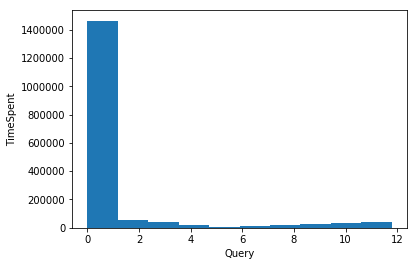

In [18]:
# time spent on a query. 
# taking log to normalize the data
plt.hist(np.where(df_query_IR_QDT["TimeSpentMin"] != 0, np.log(df_query_IR_QDT["TimeSpentMin"]), 0))
plt.xlabel("Query",fontsize=10)
plt.ylabel("TimeSpent",fontsize=10)
plt.show()


Users has searched same query over many days. This means users are either not bookmarking their expected results or clearing search history (i.e. previous url does not popup)

To get better perspective of user search behaviour, lets put a condition that time duration is within a day and First-Visit and Last-Visit are on same day


In [19]:
df_query_IR_QDT["FirstTimeVisitedDay"] = [d.day for d in df_query_IR_QDT["FirstTimeVisited"]]
df_query_IR_QDT["LastTimeVisitedDay"] = [d.day for d in df_query_IR_QDT["LastTimeVisited"]]


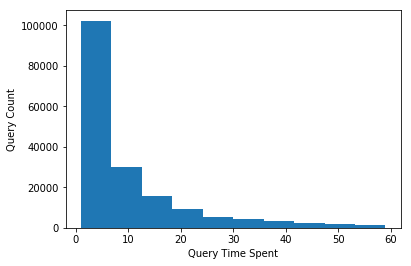

In [20]:
# distribution of Queries ending within a hour

queryEnd1hr = df_query_IR_QDT[(df_query_IR_QDT["TimeSpentMin"]>0) & (df_query_IR_QDT["TimeSpentMin"] < 60)
             & (df_query_IR_QDT["FirstTimeVisitedDay"] == df_query_IR_QDT["LastTimeVisitedDay"])]
plt.hist(queryEnd1hr["TimeSpentMin"])
plt.xlabel("Query Time Spent",fontsize=10)
plt.ylabel("Query Count",fontsize=10)
plt.show()


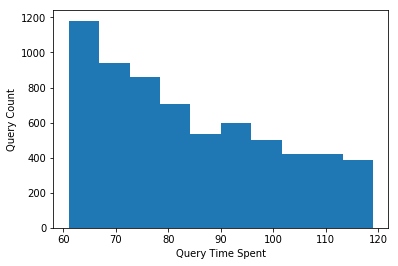

In [21]:
# distribution of Queries ending between 1-to-2 hour
plt.hist(df_query_IR_QDT[(df_query_IR_QDT["TimeSpentMin"]>60) & (df_query_IR_QDT["TimeSpentMin"] < 120)
            & (df_query_IR_QDT["FirstTimeVisitedDay"] == df_query_IR_QDT["LastTimeVisitedDay"])]["TimeSpentMin"])
plt.xlabel("Query Time Spent",fontsize=10)
plt.ylabel("Query Count",fontsize=10)
plt.show()


### c) What are some common queries?

### d) Which queries do not typically lead to a click?
itemrank and clickurl are null 

In [22]:
NoClkQryCnt = pd.DataFrame(df[df["ItemRank"].isna()].groupby(by="Query")["AnonID"] \
                           .count().sort_values(ascending=False)).reset_index()
NoClkQryCnt.columns = ['Query','Count']
print("{} queries i.e. {}% did not led to any click".format(NoClkQryCnt.shape[0],NoClkQryCnt.shape[0]*100/totalQuery))
NoClkQryCnt.head(30)


785978 queries i.e. 21.74510154361343% did not led to any click


,Query,Count
0,-,67170
1,google,6595
2,ebay,6410
3,internet,3791
4,yahoo.com,3516
5,mapquest,3110
6,http,3101
7,google.com,2619
8,yahoo,2168
9,myspace.com,2137


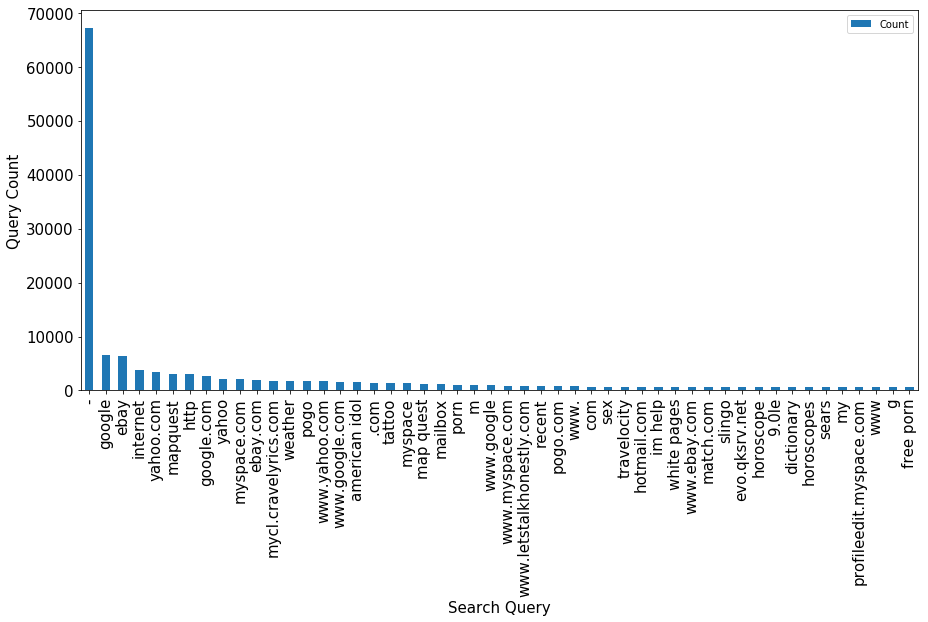

In [23]:
plot = NoClkQryCnt.head(50).plot.bar(x='Query',y='Count',figsize=(15,7),fontsize=15) 
plot.set_xlabel("Search Query",fontsize=15) 
plot.set_ylabel("Query Count",fontsize=15)
plt.show()

#### From above we can infer:
1. A weird search (-) tops the list of queries that does not lead to click
2. 21.75% of queries led to no click
##### If we ignore above: 

2. 'gooogle' and 'ebay' tops the list. Looks like users are not able memorize even the simplest of keywords

### e) Which queries almost always lead to a click?
groupby queries and itemrank(null)

In [24]:
#df1 = df[['Query','ItemRank']]
df1 = df[['Query']]
df1['ledToClick'] = df['ItemRank'].notnull().astype(int)
df1=pd.DataFrame(df1.groupby(df1.columns.tolist()).size().reset_index().rename(columns={0:'count'}) \
                 .sort_values(by="count",ascending=False) )
df1.head(50)


C:\Users\yadav\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Query,ledToClick,count
469,-,0,67170
470,-,1,31384
448017,google,1,25801
1386184,yahoo,1,11176
448016,google,0,6595
336559,ebay,1,6539
336558,ebay,0,6410
743495,myspace,1,6302
674915,mapquest,1,5570
448622,google.com,1,5520


### f) Which queries do not seem to have relevant results? You should define this in your own terms and back it up with data.
--Done above

### g) How long is the typical time spent by users on the search engine ? What does this distribution look like ?
-- Done above

### h) What are the top urls that show up in results?

In [25]:
df.head()

,AnonID,Query,QueryTime,ItemRank,ClickURL,QDate,QTime,URL
0,479,family guy,2006-03-01 16:01:20,NaN,NaN,2006-03-01,16:01:20,NaN
1,479,also sprach zarathustra,2006-03-02 14:48:55,NaN,NaN,2006-03-02,14:48:55,NaN
2,479,family guy movie references,2006-03-03 22:37:46,1.0,http://www.familyguyfiles.com,2006-03-03,22:37:46,familyguyfiles.com
3,479,top grossing movies of all time,2006-03-03 22:42:42,1.0,http://movieweb.com,2006-03-03,22:42:42,movieweb.com
4,479,top grossing movies of all time,2006-03-03 22:42:42,2.0,http://www.imdb.com,2006-03-03,22:42:42,imdb.com


In [26]:
df2 = df.groupby(by="URL").size().reset_index().rename(columns={0:"count"}).sort_values(by="count",ascending=False)
df2["countPer"] = (df2["count"]*100/totalQuery).round(4)
df2.head(20)

,URL,count,countPer
148005,google.com,36104,0.9989
380182,yahoo.com,16271,0.4502
234069,myspace.com,16063,0.4444
116060,en.wikipedia.org,12275,0.3396
19938,amazon.com,11039,0.3054
172458,imdb.com,9792,0.2709
211962,mapquest.com,9462,0.2618
110973,ebay.com,7613,0.2106
210261,mail.yahoo.com,4814,0.1332
36620,bankofamerica.com,4509,0.1247


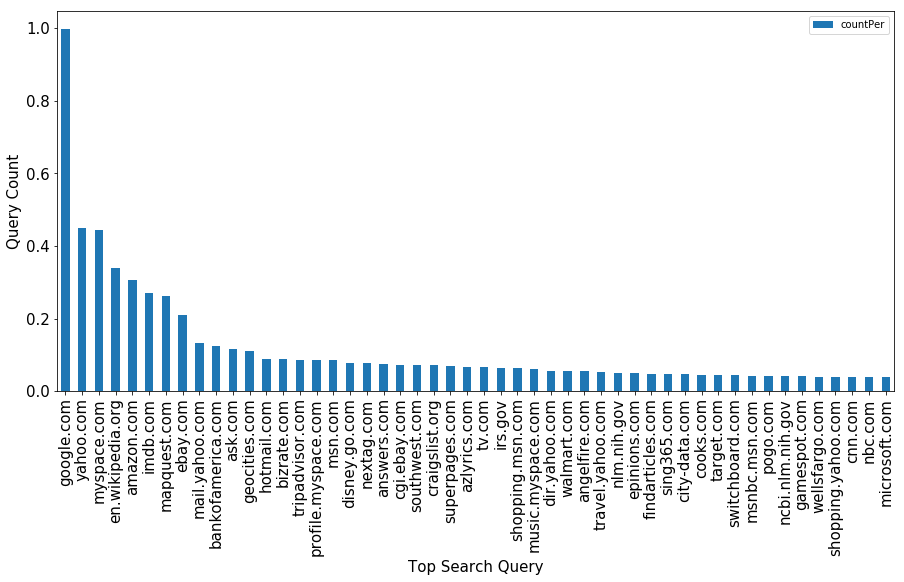

In [27]:
plot = df2.head(50).plot.bar(x='URL',y='countPer',figsize=(15,7),fontsize=15) 
plot.set_xlabel("Top Search Query",fontsize=15) 
plot.set_ylabel("Query Count",fontsize=15)
plt.show()

#### From above we can infer:
1. Aprox 1% of user used current search to search other search provides. "google.com" tops the list. Other substantial being ask.com
2. wikipedia comes to resuces to 0.3% of users
3. More than 0.5% of users found items to purchase for their searches (amazon.com, ebay.com)
3. 0.25% users found movies relevant to their searches (imdb.com)

# 2. Clustering
##### < have to restart kernel to free memory, load dataset >


For clustering, we will add new features to our dataset and will drop common features such as year


b) What features will you consider? 
 - have added few features and have deleted some

c) Which clustering algorithm will you use? 
 - K means/modes clustering

d) How will you choose the right number of clusters?
 - elbow method

e) What distance metric will you choose?
 - eucladian distance 


In [5]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn import preprocessing
from kmodes.kmodes import KModes

In [6]:
#[d.year for d in df["QDate"]]
df["QMon"] = [d.month for d in df["QDate"]]
df["QDay"] = [d.day for d in df["QDate"]]
df["QHour"] = [d.hour for d in df["QTime"]]
df["QMin"] = [d.minute for d in df["QTime"]]
df["QSec"] = [d.second for d in df["QTime"]]
df["ledToClick"] = df['ItemRank'].notnull().astype(int)
df = df.drop(["QueryTime","QDate","QTime"],axis=1)
df.head(10)

,AnonID,Query,ItemRank,ClickURL,URL,QMon,QDay,QHour,QMin,QSec,ledToClick
0,479,family guy,NaN,NaN,NaN,3,1,16,1,20,0
1,479,also sprach zarathustra,NaN,NaN,NaN,3,2,14,48,55,0
2,479,family guy movie references,1.0,http://www.familyguyfiles.com,familyguyfiles.com,3,3,22,37,46,1
3,479,top grossing movies of all time,1.0,http://movieweb.com,movieweb.com,3,3,22,42,42,1
4,479,top grossing movies of all time,2.0,http://www.imdb.com,imdb.com,3,3,22,42,42,1
5,479,car decals,4.0,http://www.decaljunky.com,decaljunky.com,3,3,23,20,12,1
6,479,car decals,1.0,http://www.modernimage.net,modernimage.net,3,3,23,20,12,1
7,479,car decals,5.0,http://www.webdecal.com,webdecal.com,3,3,23,20,12,1
8,479,car window decals,9.0,http://www.customautotrim.com,customautotrim.com,3,3,23,24,5,1
9,479,car window sponsor decals,3.0,http://www.streetglo.net,streetglo.net,3,3,23,27,17,1


In [7]:
# maintain a copy to add cluster later on
df_copy = df.copy()

In [8]:
# handle null values in way that does not give issue in label-encoding
df["Query"] = df["Query"].fillna("NA")
df["ItemRank"] = df["ItemRank"].fillna(0)
df["ClickURL"] = df["ClickURL"].fillna("NA")
df["URL"] = df["URL"].fillna("NA")
df.isna().sum()


AnonID        0
Query         0
ItemRank      0
ClickURL      0
URL           0
QMon          0
QDay          0
QHour         0
QMin          0
QSec          0
ledToClick    0
dtype: int64

In [9]:
# label encode categorial values
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)


In [10]:
df.head()

,AnonID,Query,ItemRank,ClickURL,URL,QMon,QDay,QHour,QMin,QSec,ledToClick
0,0,325050,0,0,7134,0,0,16,1,20,0
1,0,47775,0,0,7134,0,1,14,48,55,0
2,0,325069,1,173882,123586,0,2,22,37,46,1
3,0,958303,1,46679,229215,0,2,22,42,42,1
4,0,958303,2,212877,172459,0,2,22,42,42,1


In [11]:
# i wanted to run it for 10 but it takes time. So running for 5
cost = []
for n_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=n_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 30766904.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 110, cost: 29448345.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 163, cost: 28592063.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 183, cost: 28400218.0


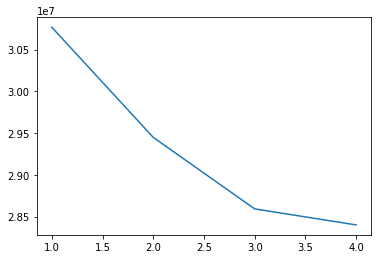

In [12]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

## Taking number-of-clusters = 3

In [11]:
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
clusters_cao = km_cao.fit_predict(df)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 163, cost: 28592063.0


In [12]:
cdf = pd.DataFrame(clusters_cao)
cdf.columns = ['cluster']
cdf.head()

,cluster
0,0
1,0
2,0
3,0
4,0


In [13]:
cdf['cluster'].value_counts()

0    1727669
1    1139956
2     746881
Name: cluster, dtype: int64

In [14]:
# combine clusters with dataset
newdf = pd.concat([df_copy,cdf],axis=1)
newdf.head()

,AnonID,Query,ItemRank,ClickURL,URL,QMon,QDay,QHour,QMin,QSec,ledToClick,cluster
0,479,family guy,NaN,NaN,NaN,3,1,16,1,20,0,0
1,479,also sprach zarathustra,NaN,NaN,NaN,3,2,14,48,55,0,0
2,479,family guy movie references,1.0,http://www.familyguyfiles.com,familyguyfiles.com,3,3,22,37,46,1,0
3,479,top grossing movies of all time,1.0,http://movieweb.com,movieweb.com,3,3,22,42,42,1,0
4,479,top grossing movies of all time,2.0,http://www.imdb.com,imdb.com,3,3,22,42,42,1,0


In [20]:
newdf1 = pd.concat([df,cdf],axis=1)
newdf1.head()

,AnonID,Query,ItemRank,ClickURL,URL,QMon,QDay,QHour,QMin,QSec,ledToClick,cluster
0,0,325050,0,0,7134,0,0,16,1,20,0,0
1,0,47775,0,0,7134,0,1,14,48,55,0,0
2,0,325069,1,173882,123586,0,2,22,37,46,1,0
3,0,958303,1,46679,229215,0,2,22,42,42,1,0
4,0,958303,2,212877,172459,0,2,22,42,42,1,0


In [18]:
km_cao.cluster_centroids_

array([[  8748,    434,      0,      0,   7134,      0,      2,     21,
            43,     33,      1],
       [  8748, 394932,      0,      0,   7134,      2,     21,     20,
            46,     12,      1],
       [  8748, 297143,      0,      0,   7134,      1,     22,     19,
            39,     52,      1]], dtype=int64)

### visualization pending showing cluster-points over data

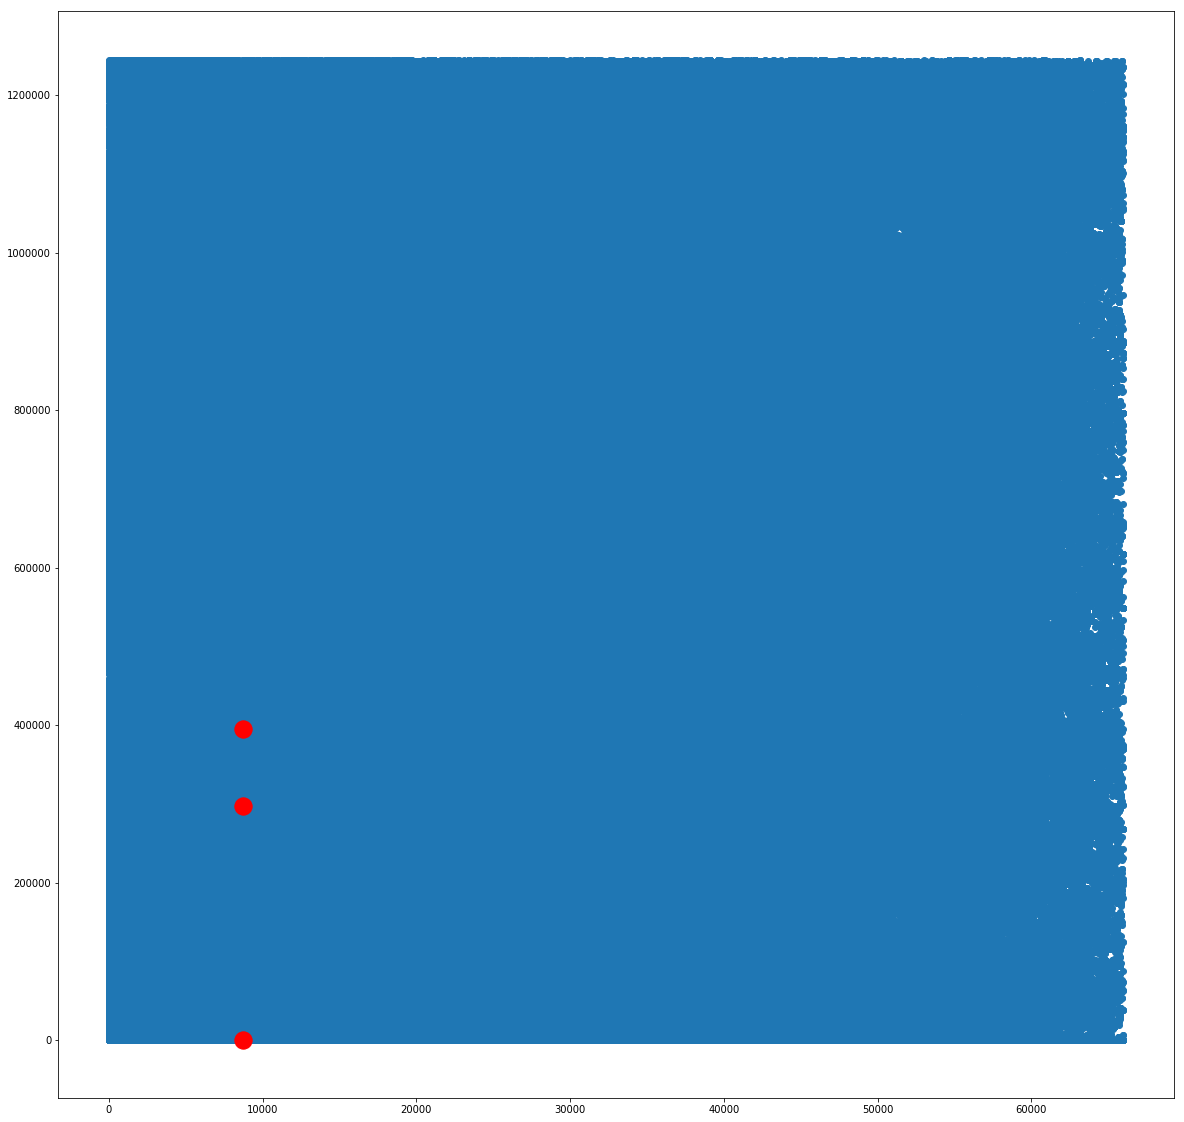

In [24]:
plt.figure(figsize=(20, 20))
plt.scatter(newdf1["AnonID"], newdf1["Query"])
plt.scatter(km_cao.cluster_centroids_[:, 0], km_cao.cluster_centroids_[:, 1], s=300, c='red')
